# Census Income
Project description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
#import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('census_income.csv')

In [3]:
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


As we are predicting whether or not the income is over or below 50,000, we can infer that this will be a classification problem.

In [4]:
data.shape

(32560, 15)

In [5]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Mix of data types which will need to be addressed with encoding methods at a later point. Income is object which confirms that I will be treating this as a classification problem. 

In [7]:
data.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values

In [9]:
#checking the unique values
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

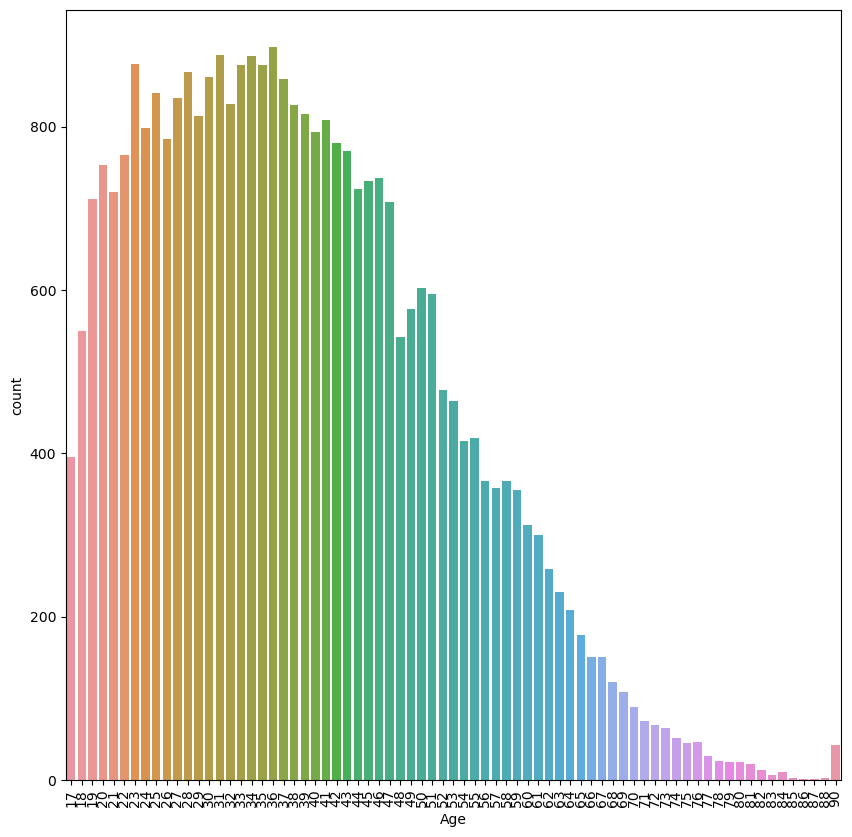

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(data['Age'])
plt.xticks(rotation=90)
plt.show()

In [12]:
data['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

People in their 30's have the highest count. 

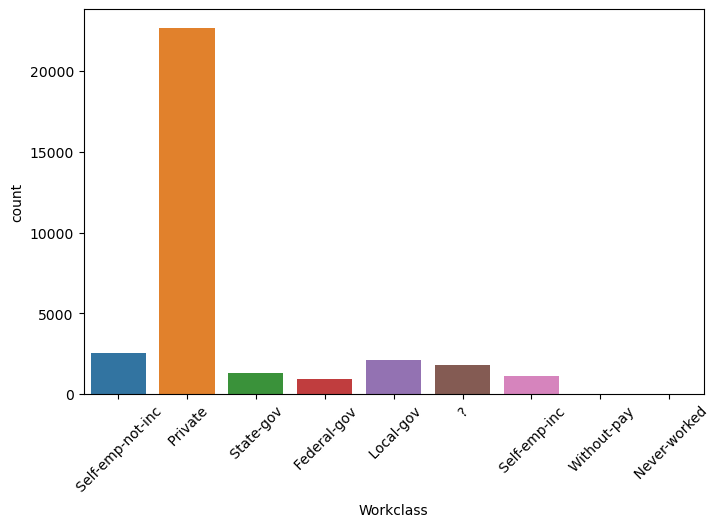

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data['Workclass'])
plt.xticks (rotation=45)
plt.show()

I can see there is '?', which should be treated as a null value. I can also see that people from the private sector make up the majority of the census.

In [14]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

1836 entries have been marked as '?'. These need to be treated as null values.

In [15]:
print (data["Workclass"].mode())

0     Private
Name: Workclass, dtype: object


In [16]:
#replace '?' with modal value
data['Workclass'] = data.Workclass.str.replace('?', 'Private')

In [17]:
data['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

There are now no '?' values, and private sector is still the highest contributer to the census

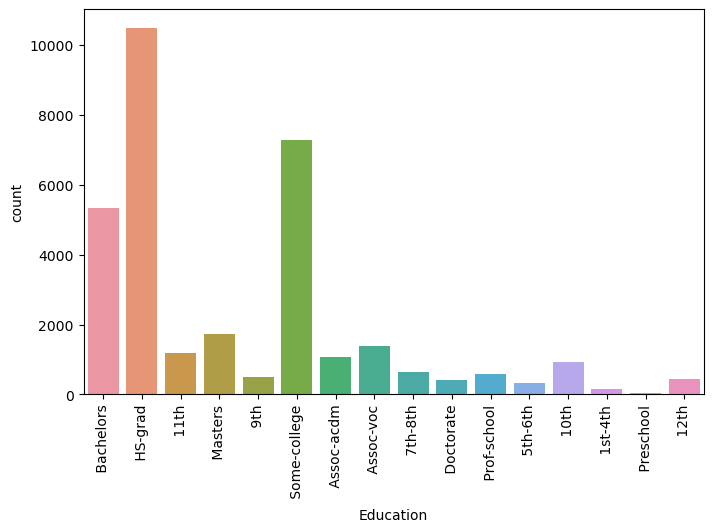

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data['Education'])
plt.xticks(rotation=90)
plt.show()

Highest count= HS-grad, followed by 'some college' and Preschool is the lowest. Will be interesting to compare this with target.

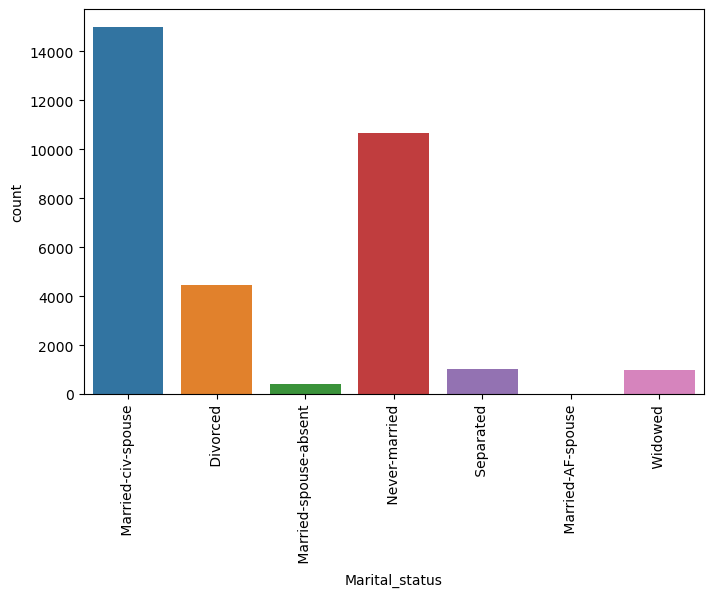

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data['Marital_status'])
plt.xticks(rotation=90)
plt.show()

Married people contribute more (Married civ spouse + married-spouse-absent + married- af- spouse > combined columns)

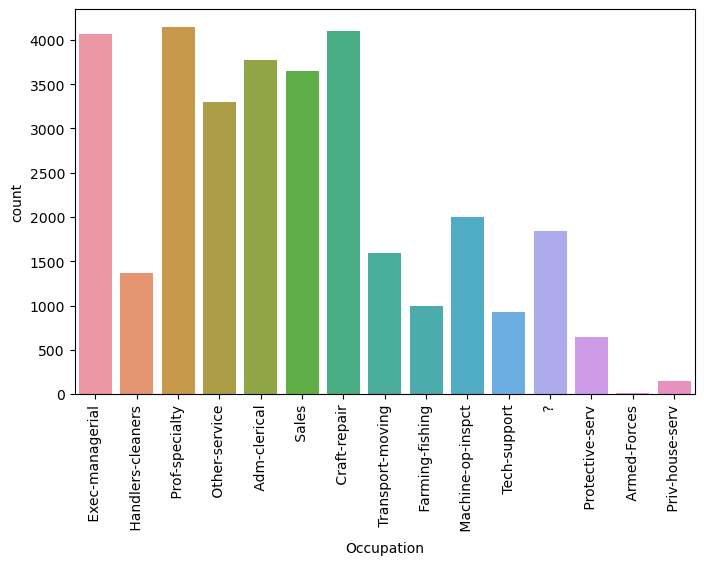

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)
plt.show()

I can see another example of where '?' has been given and needs to be treated as a null value. 

In [22]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

1843 entried need to be corrected. 

In [23]:
print (data["Occupation"].mode())

0     Prof-specialty
Name: Occupation, dtype: object


In [24]:
#replace '?' with modal value
data['Occupation'] = data.Occupation.str.replace('?', 'Prof-specialty')

In [25]:
data['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

All examples of '?' removed. Prof-specialty is highest and armed forces is lowest.

In [26]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

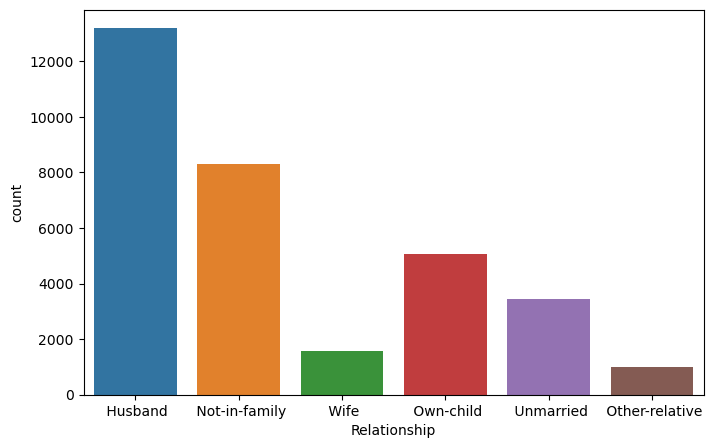

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data['Relationship'])
plt.show()

husband is the highest count of contributors

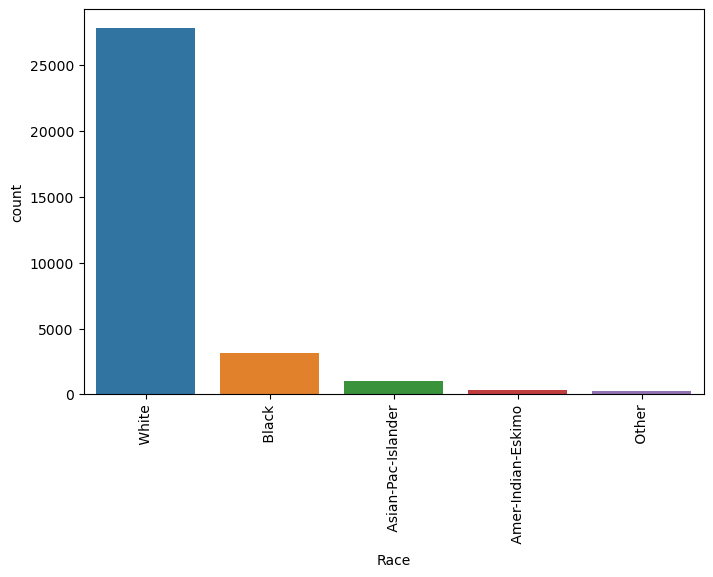

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data['Race'])
plt.xticks(rotation=90)
plt.show()

Majority of contributors white with 'other' being the lowest count for race

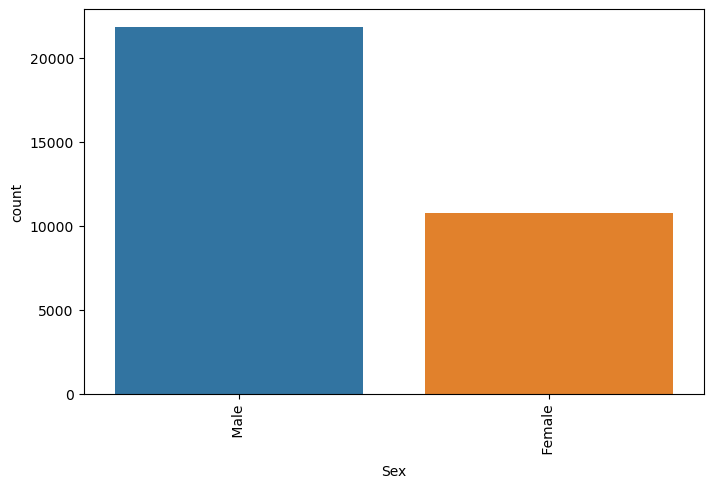

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data['Sex'])
plt.xticks(rotation=90)
plt.show()

Male has the highest count

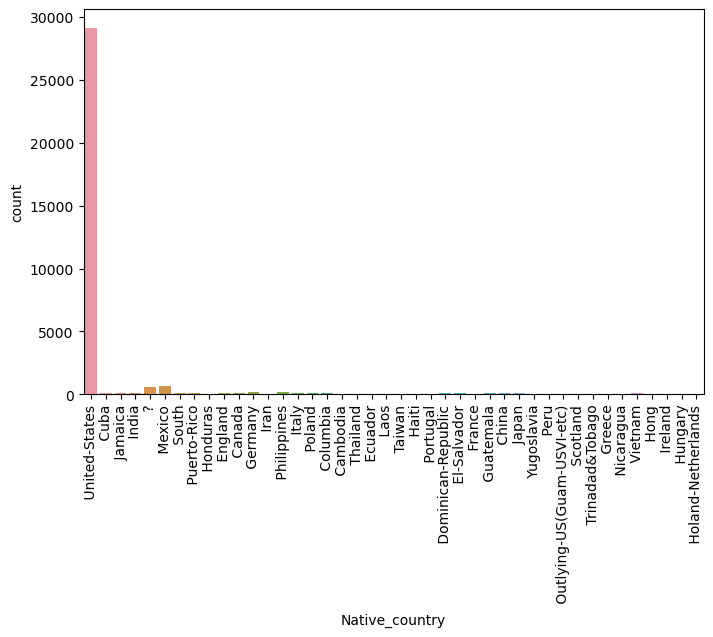

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data['Native_country'])
plt.xticks(rotation=90)
plt.show()

In [32]:
#replace '?' with modal value (United-States)
data['Native_country'] = data.Native_country.str.replace('?', 'United-States')

In [33]:
data['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

All '?' values removed. United States unsurprisingly has the highest count

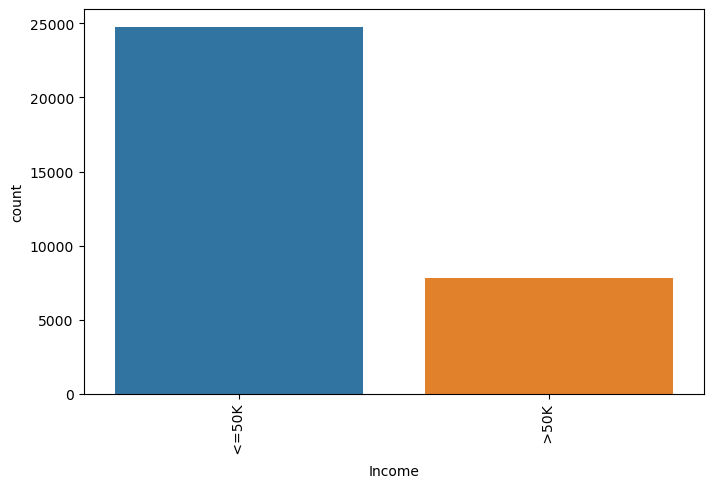

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data['Income'])
plt.xticks(rotation=90)
plt.show()

Majority of contributors earned less than 50,000

In [35]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

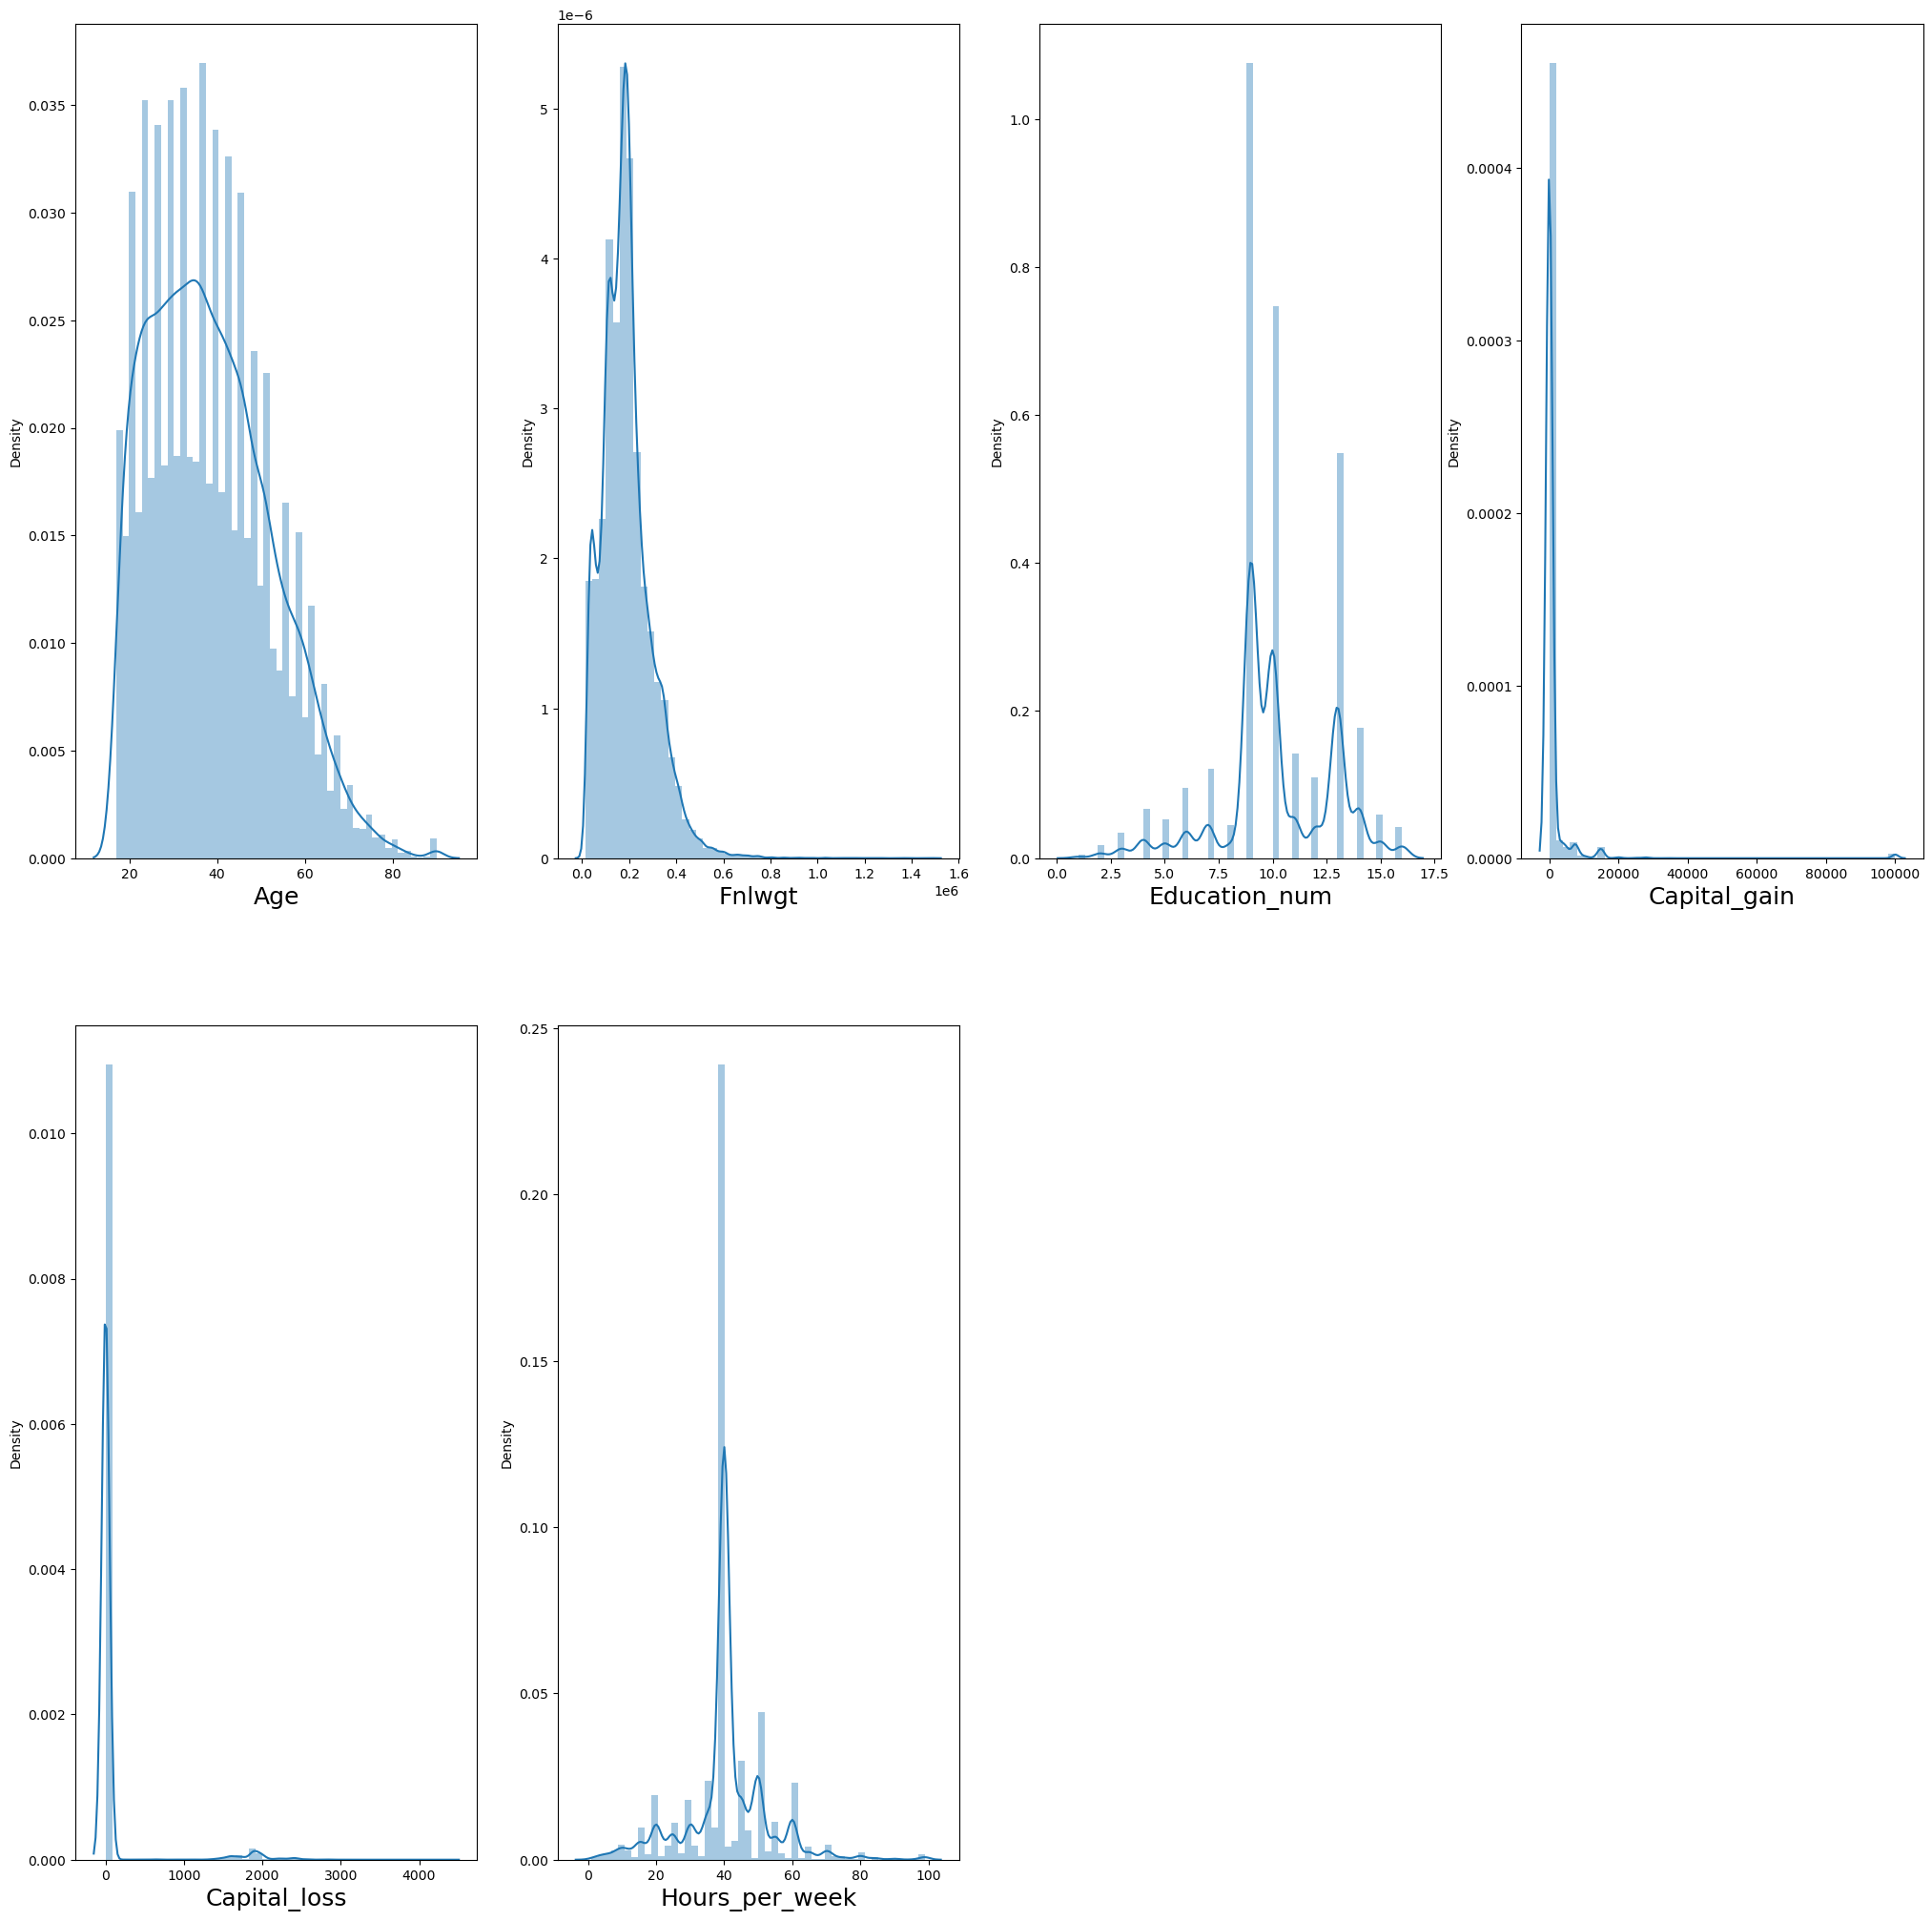

In [36]:
#Check the distribution in the numerical columns 
columns = ['Age', 'Fnlwgt', 'Education_num',
       'Capital_gain', 'Capital_loss', 'Hours_per_week']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 7:
        ax = plt.subplot(2, 4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()

Left skew present in dataset which can be treated with powertransform. Capital gain and loss appear to have large amounts of 0, so may be dropped as they won't offer much in terms of analysis.

In [37]:
data['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [38]:
data['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [39]:
# Dropping irrelevant columns
data.drop(columns=["Capital_loss", "Capital_gain"], axis=1, inplace=True)

In [41]:
data.tail(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


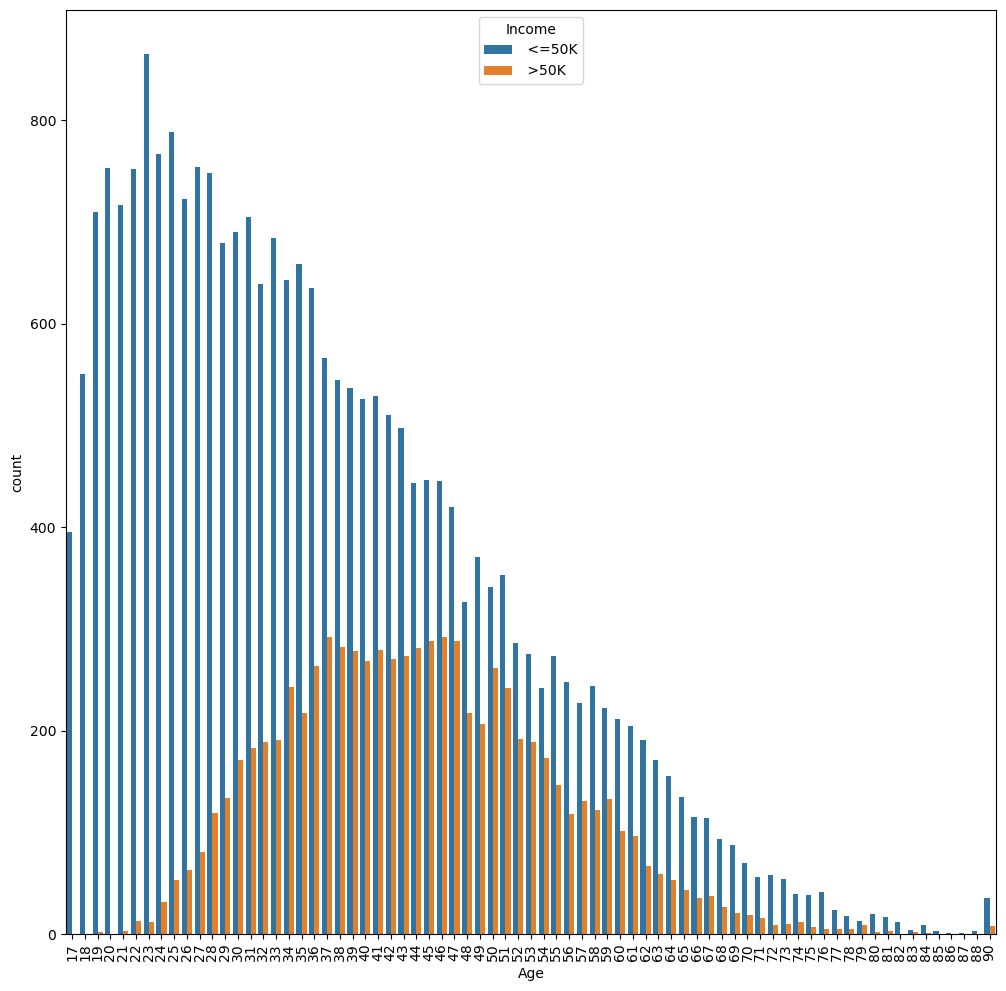

In [45]:
#explore features in relation with target 
print(data["Age"].value_counts())
plt.figure(figsize=(12, 12))
sns.countplot(data["Age"],hue=data["Income"])
plt.xticks(rotation=90)
plt.show()

23 year olds have the highest number of people paid less than 50,000 whereas 37 year olds have the highest amount of people paid over that threshold.

In [46]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


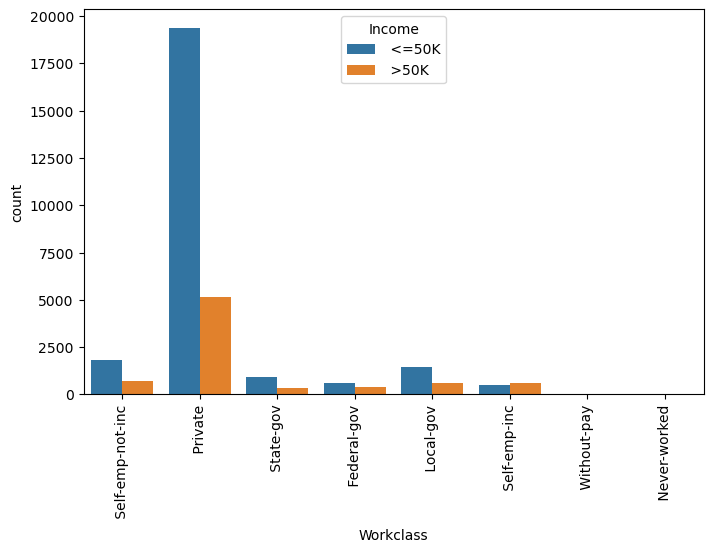

In [49]:
#explore features in relation with target 
print(data["Workclass"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data["Workclass"],hue=data["Income"])
plt.xticks(rotation=90)
plt.show()

The private sector has the highest amount of people paid more than 50,000 as well as less than 50,000 although the private sector was the biggest contributor to the census, so that makes sense.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


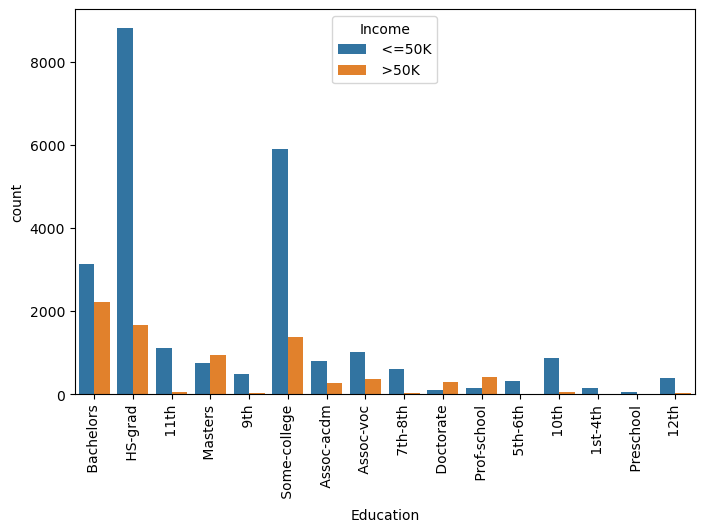

In [50]:
print(data["Education"].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data["Education"],hue=data["Income"])
plt.xticks(rotation=90)
plt.show()

Interestingly, despite not being as high as a masters degree or doctorate, bachelors has the highest paid, closely followed by high school graduates. The majority of the other columns had very few people paid over 50,000.

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


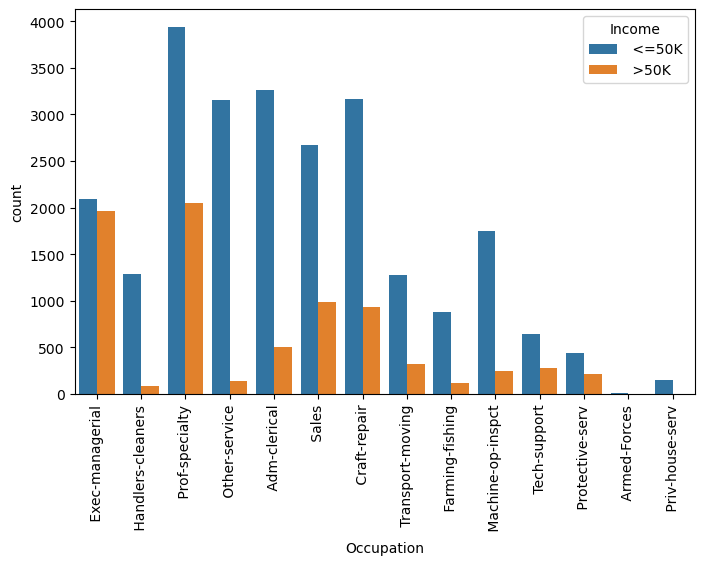

In [52]:
print(data["Occupation"].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data["Occupation"],hue=data["Income"])
plt.xticks(rotation=90)
plt.show()

Prof specialty marginally beats exec-manegerial. If the mode replace wasn't used, then perhaps exec managerial would've had higher amounts of people paid more than 50,000. As the count for prof-specialty is high, it also has a large amount of people paid less than 50,000. The armed forces has only 9 people paid more than 50,000.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


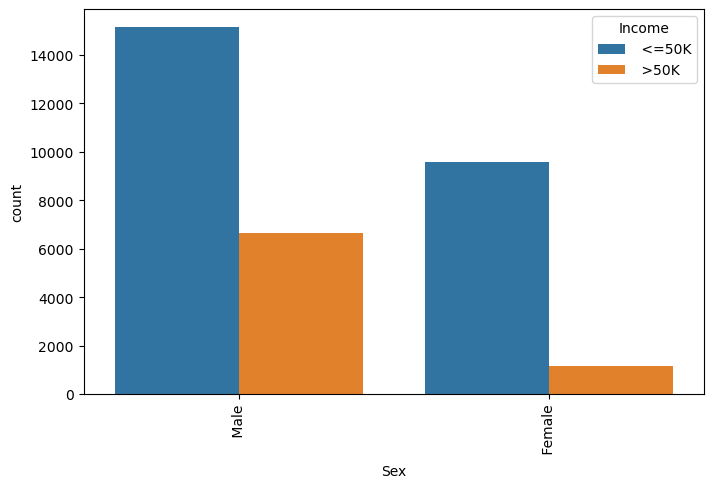

In [53]:
print(data["Sex"].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data["Sex"],hue=data["Income"])
plt.xticks(rotation=90)
plt.show()

There is a significant discrepancy between the amount of males paid more than 50,000 compared to females. Males do however, make up a significant proportion of the dataset.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


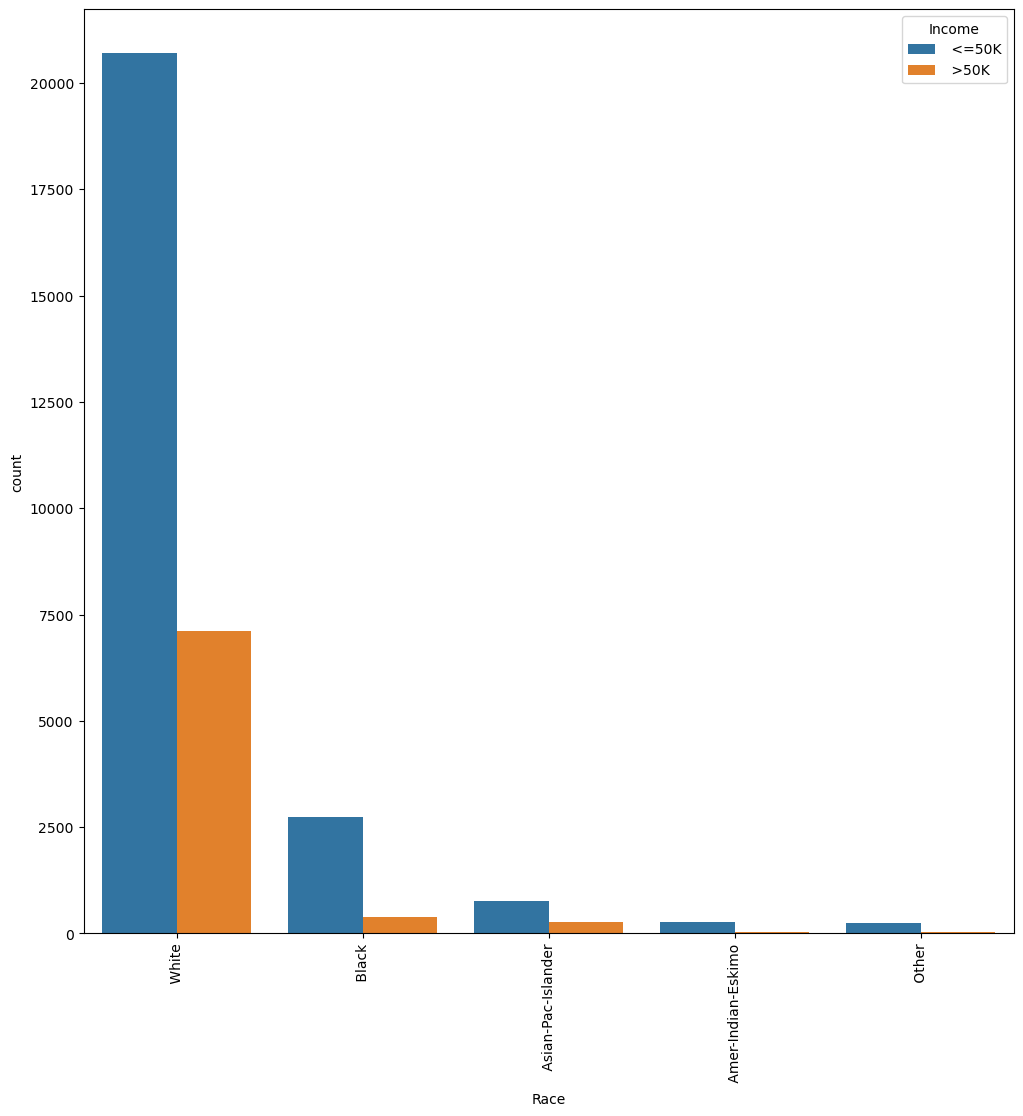

In [54]:
print(data["Race"].value_counts())
plt.figure(figsize=(12, 12))
sns.countplot(data["Race"],hue=data["Income"])
plt.xticks(rotation=90)
plt.show()

White people have the highest count with other being the lowest.

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

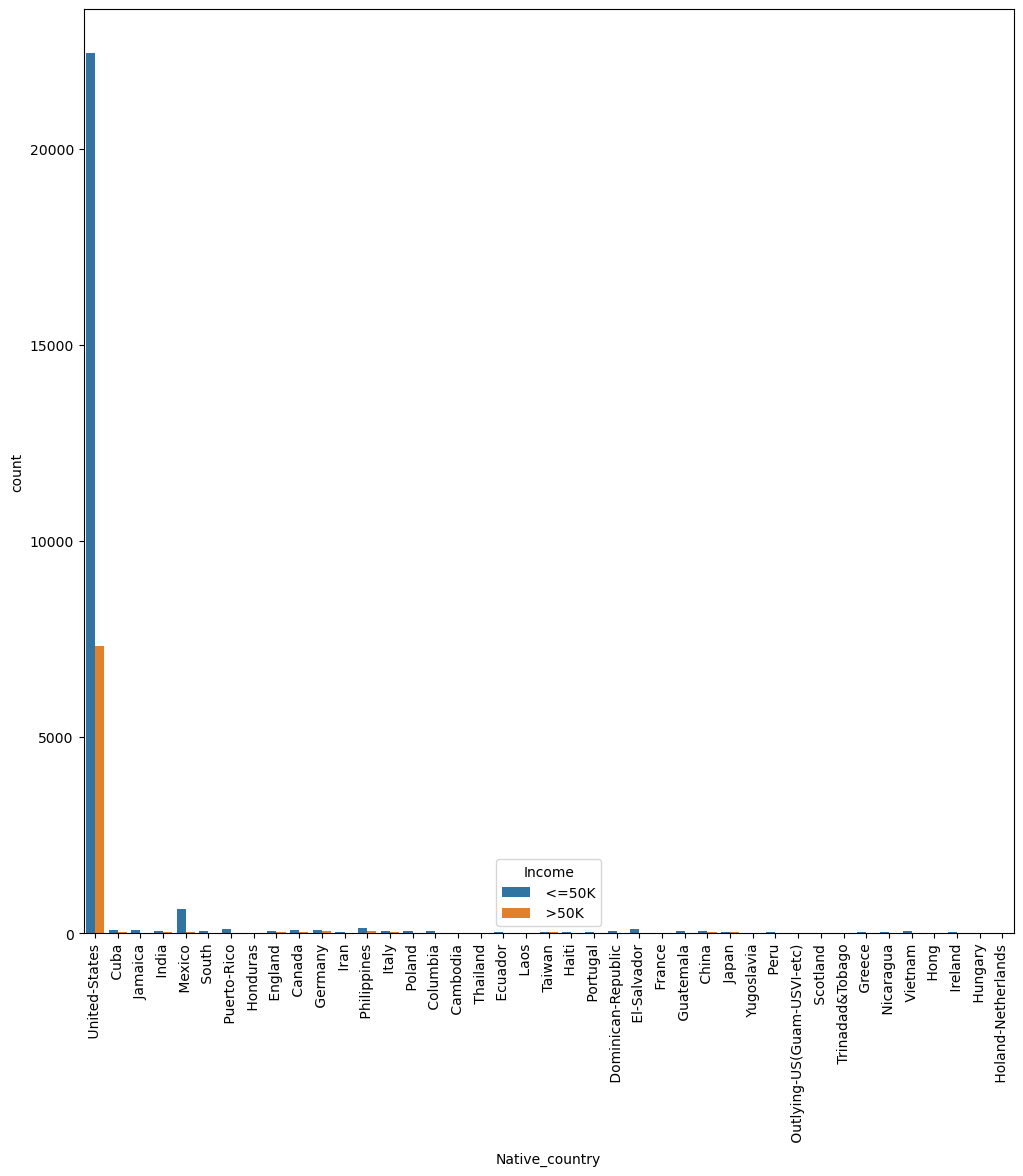

In [55]:
print(data["Native_country"].value_counts())
plt.figure(figsize=(12, 12))
sns.countplot(data["Native_country"],hue=data["Income"])
plt.xticks(rotation=90)
plt.show()

As with the previous graph, the United States is the largest contributor to the census with the highest amount of people paid over 50,000

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


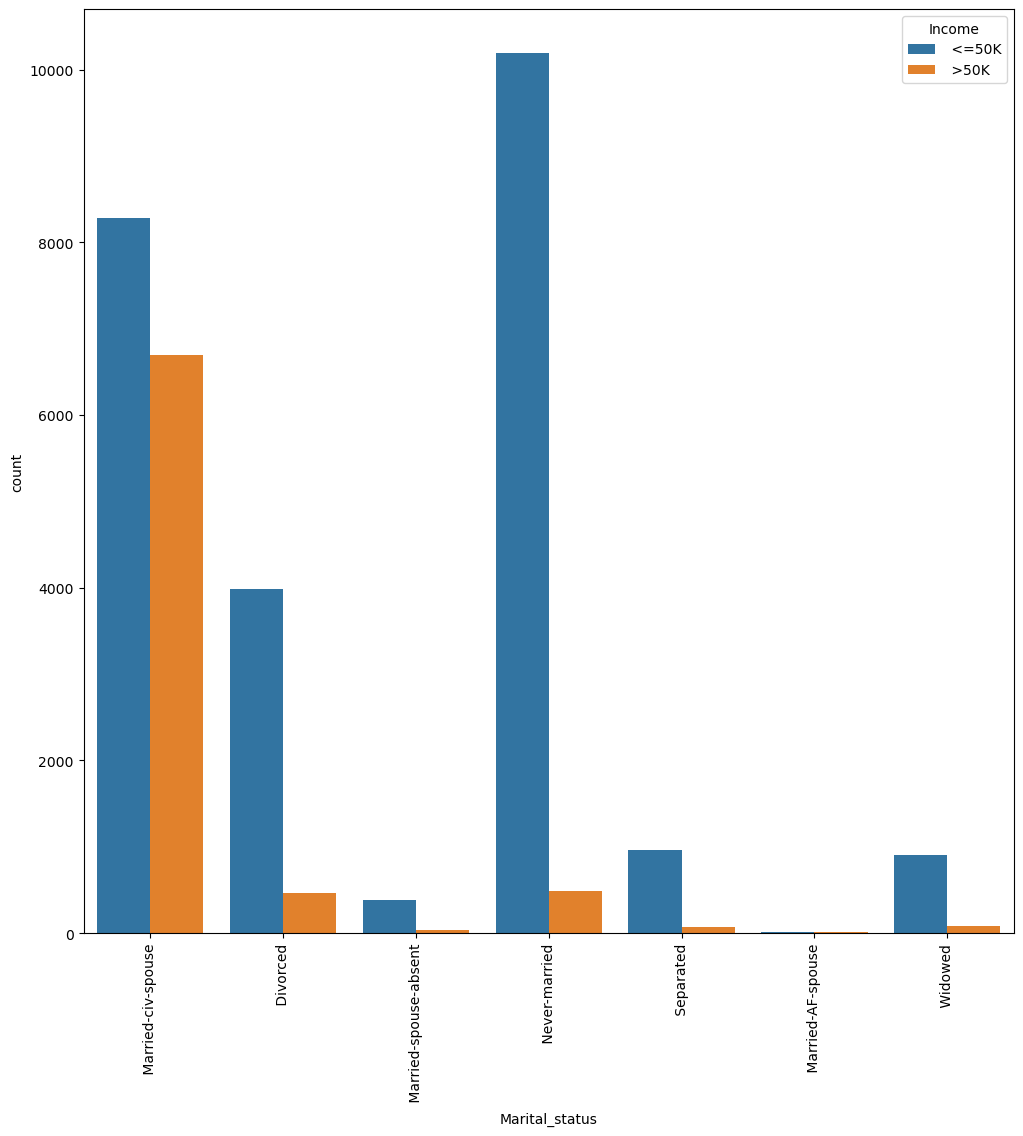

In [56]:
print(data["Marital_status"].value_counts())
plt.figure(figsize=(12, 12))
sns.countplot(data["Marital_status"],hue=data["Income"])
plt.xticks(rotation=90)
plt.show()

Married people with spouse are the highest paid

Age                  AxesSubplot(0.125,0.786098;0.227941x0.0939024)
Fnlwgt            AxesSubplot(0.398529,0.786098;0.227941x0.0939024)
Education_num     AxesSubplot(0.672059,0.786098;0.227941x0.0939024)
Hours_per_week       AxesSubplot(0.125,0.673415;0.227941x0.0939024)
dtype: object

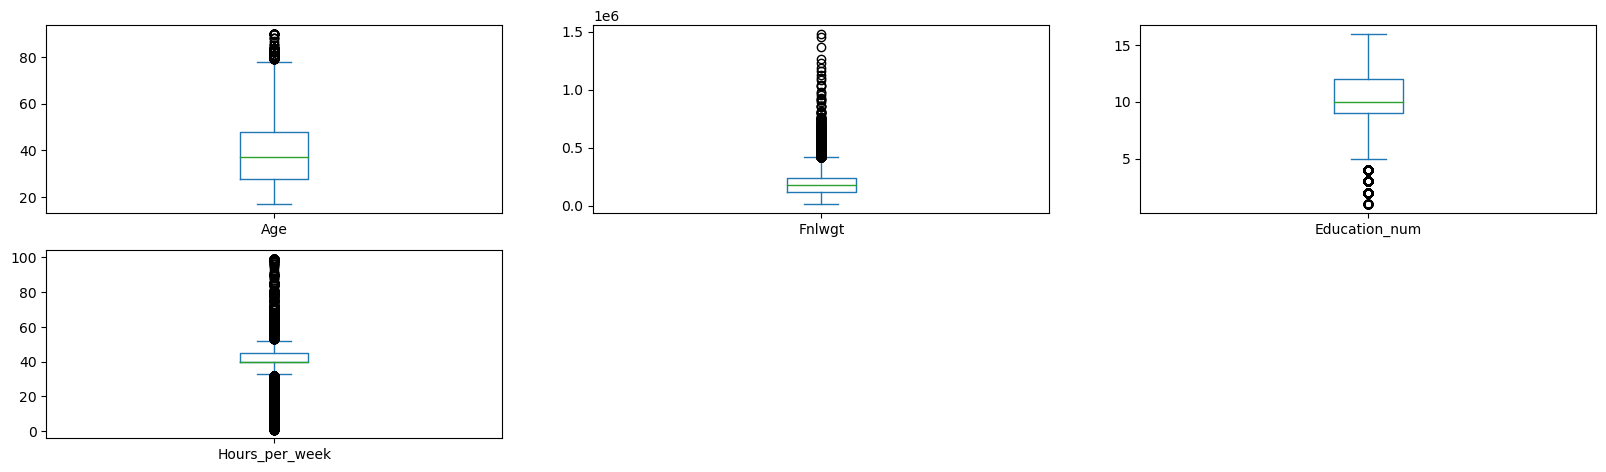

In [59]:
#Exploring outliers
data.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

All numerical columns have outliers which we can treat with zscore method after exploring correlation

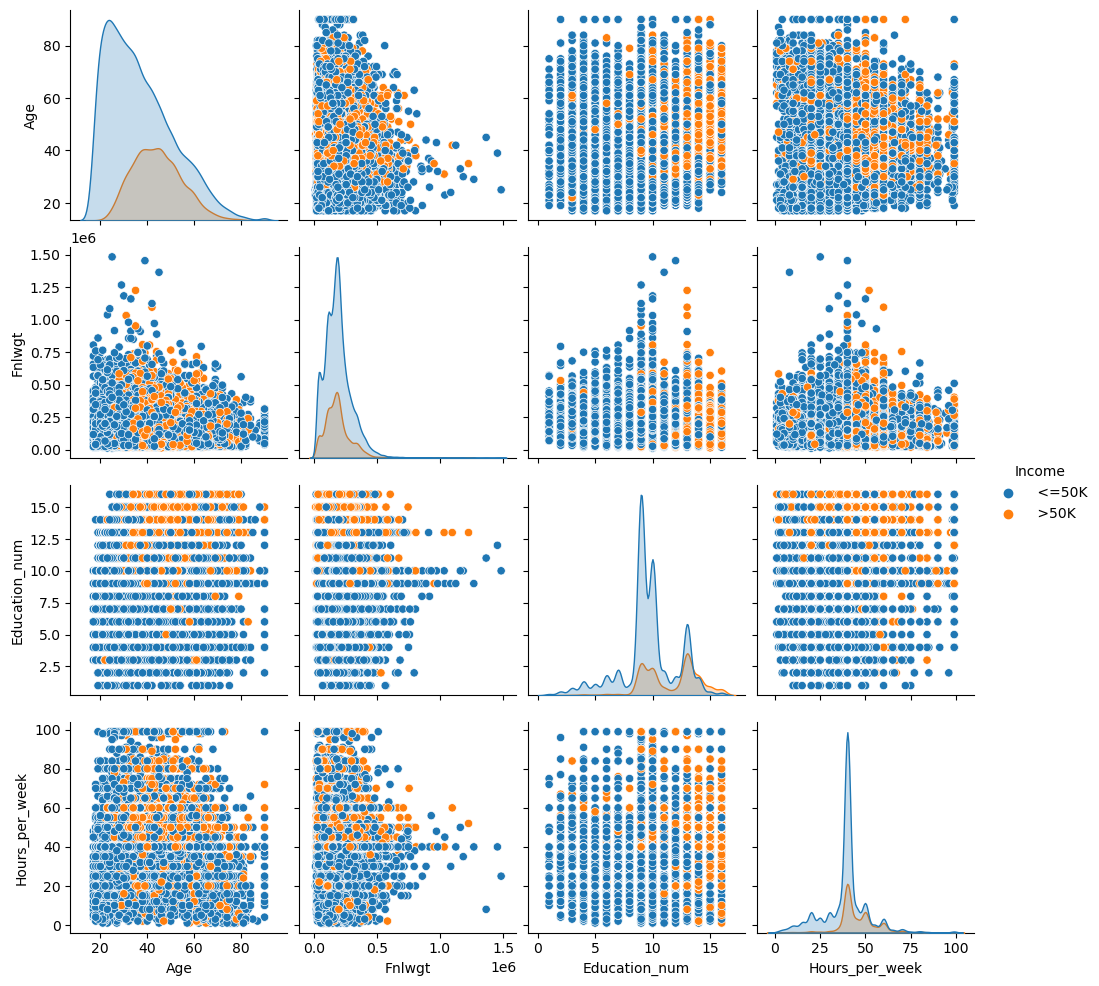

In [60]:
# Using pairplots to explore dataset among features.
sns.pairplot(data,hue="Income")

In [61]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [62]:
#As seen before, there are a range of data types. Now converting catagorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Input = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for i in Input:
    data[i] = le.fit_transform(data[i])

In [63]:
data.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,40,38,0


In [64]:
data.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

All features now numerical

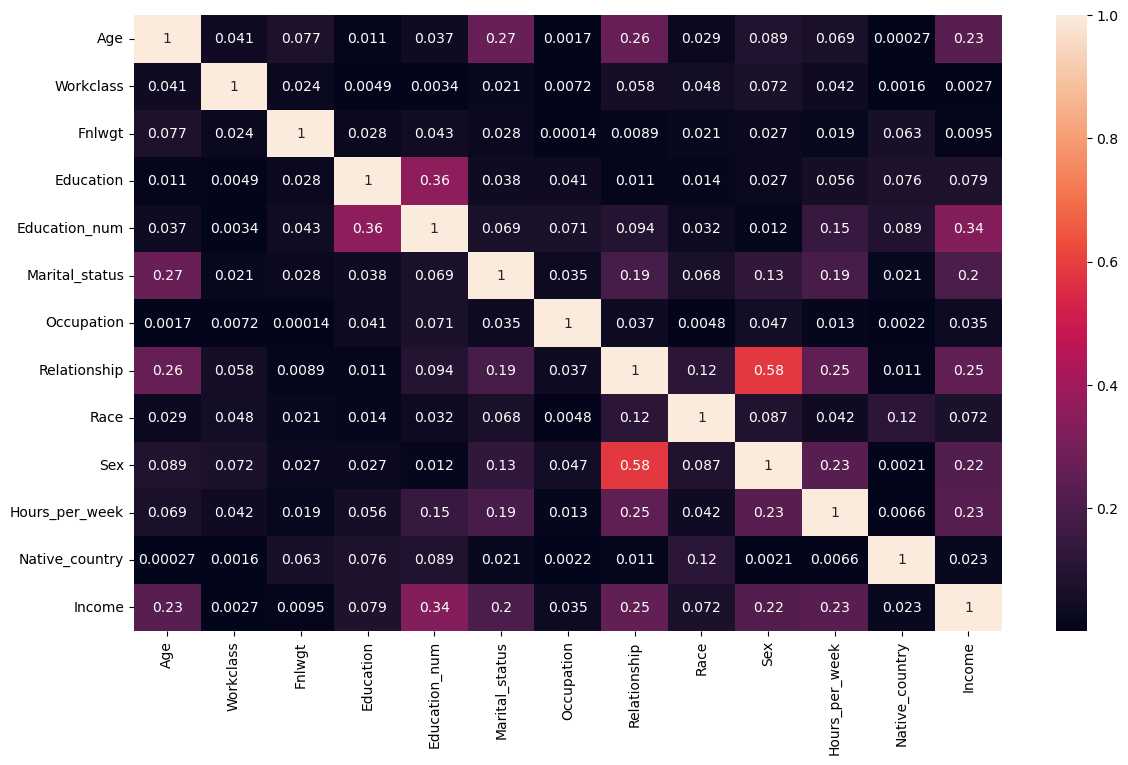

In [65]:
#Explore correlation
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

Sex and relationship correlated with one another. Education_num has the highest correlation to target

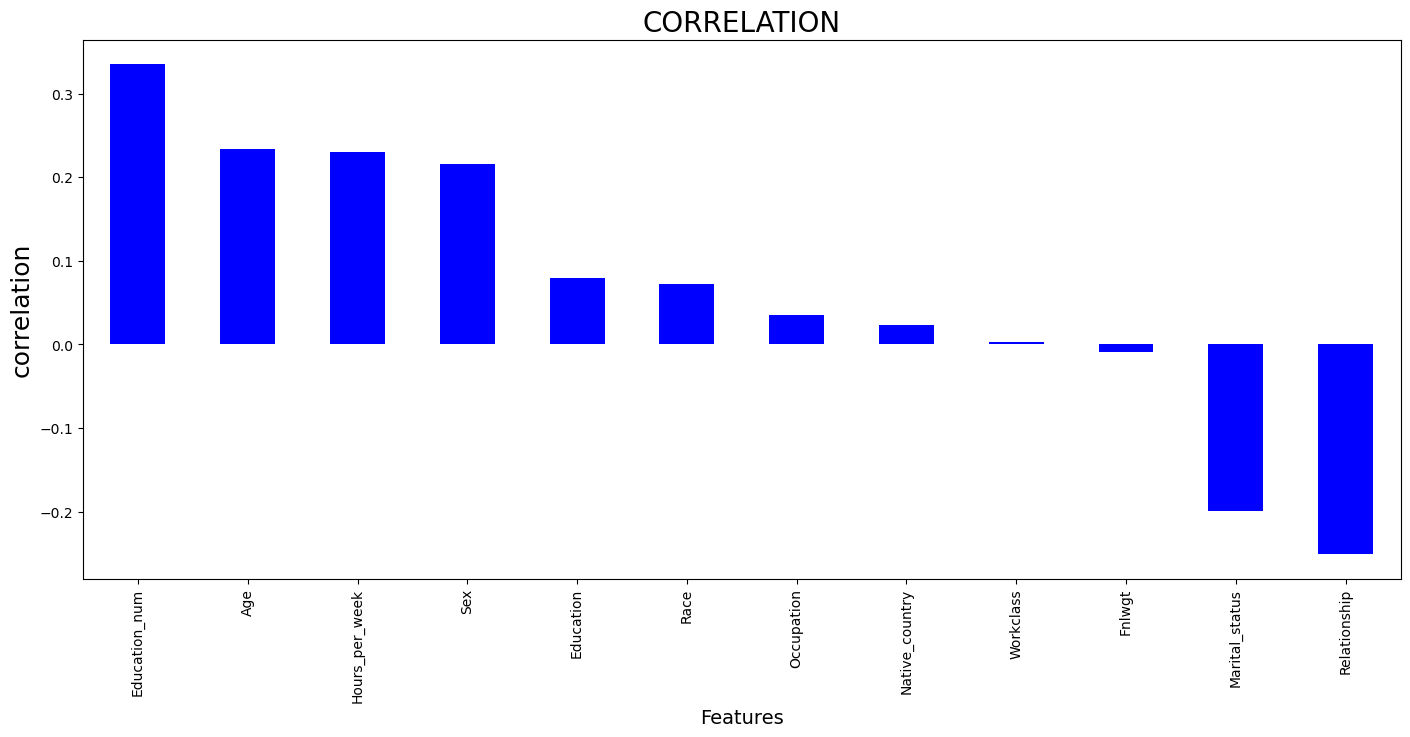

In [66]:
# check positive or negative correlation 
plt.figure(figsize=(17,7))
data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('correlation',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

Marital status and relationshup have high negative correlation with the target.

In [67]:
#confirming correlation amounts 
data.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.002739
Native_country    0.023063
Occupation        0.034599
Race              0.071853
Education         0.079311
Sex               0.215995
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

In [68]:
#Using Zscore to remove outliers
data.shape

(32560, 13)

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([11, 10,  8, ...,  8,  8,  8], dtype=int64))

In [70]:
#Removing outliers
outliers = np.where(z > threshold)
outlier_rows = outliers[0]
data_new = data.drop(index=data.index[outlier_rows])

In [71]:
data_new.shape

(29296, 13)

In [72]:
Dataloss=((32560-29296)/32560)*100
Dataloss

10.024570024570025

10% data loss.

In [73]:
#removingskewness
data_new.skew()

Age               0.466130
Workclass         0.070097
Fnlwgt            0.629685
Education        -0.962352
Education_num    -0.134690
Marital_status   -0.021495
Occupation        0.012196
Relationship      0.788384
Race             -2.621072
Sex              -0.716832
Hours_per_week   -0.349106
Native_country   -5.522988
Income            1.198690
dtype: float64

In [74]:
data_new.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [75]:
#Using Yeojohnson to deal with skewness in non-categorical columns
from sklearn.preprocessing import PowerTransformer

columns_to_transform=['Age','Fnlwgt', 'Education']          
PT = PowerTransformer(method='yeo-johnson')

data_new[columns_to_transform] = PT.fit_transform(data_new[columns_to_transform])


In [76]:
data_new.skew()

Age              -0.020733
Workclass         0.070097
Fnlwgt           -0.034006
Education        -0.306616
Education_num    -0.134690
Marital_status   -0.021495
Occupation        0.012196
Relationship      0.788384
Race             -2.621072
Sex              -0.716832
Hours_per_week   -0.349106
Native_country   -5.522988
Income            1.198690
dtype: float64

Skewness reduced in non-categorical columns

In [77]:
#Separate into dependent and independent variables
x=data_new.drop (columns=['Income'], axis=1)
y=data_new['Income']

In [78]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data_new)
x_scaled

array([[ 0.91204079,  1.7286537 , -1.12631449, ..., -2.42528723,
         0.18476329, -0.56652333],
       [ 0.1077246 , -0.0798505 ,  0.41554294, ..., -0.01043799,
         0.18476329, -0.56652333],
       [ 1.08946483, -0.0798505 ,  0.59607536, ..., -0.01043799,
         0.18476329, -0.56652333],
       ...,
       [ 1.36866367, -0.0798505 , -0.24768067, ..., -0.01043799,
         0.18476329, -0.56652333],
       [-1.34677584, -0.0798505 ,  0.27685924, ..., -1.7992152 ,
         0.18476329, -0.56652333],
       [ 1.03120401,  0.8244016 ,  1.06736007, ..., -0.01043799,
         0.18476329,  1.76515236]])

In [79]:
#Split data into Xtrain/test and ytrain/test
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 3)

In [80]:
#importing ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


In [82]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79650171 0.79752507 0.81224664 0.79880521 0.79859185]
0.8007340942305745


Promising scores from logistic regression

In [83]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82380546 0.82590143 0.8372093  0.83315554 0.82142095]
0.8282985361441966


Higher scores than LR

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state =1)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77431741 0.77170898 0.79091103 0.77320247 0.76808193]
0.775644364522887


Not as high as previous scores

In [86]:
KNN= KNeighborsClassifier()
cv = cross_val_score(KNN,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81015358 0.8090463  0.81992746 0.81587369 0.81352678]
0.8137055620403834


Close to RandomForest but not quite as high

In [89]:
#Finding best params
from sklearn.metrics import make_scorer

rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring=make_scorer(accuracy_score), cv=5)
grid_search_rf.fit(x_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Best Random Forest Model - Hyperparameters: {best_params_rf}, Accuracy: {accuracy_rf}")


Best Random Forest Model - Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}, Accuracy: 0.8361774744027304


84% with these parameters is good. 

In [90]:
rf=RandomForestClassifier(n_estimators= 200, max_depth= 10, min_samples_split=10)
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)

In [91]:
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Model - Accuracy: {accuracy}")

Random Forest Model - Accuracy: 0.8346416382252559


In [82]:
from sklearn.metrics import classification_report
print ( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.39      0.54        36
           1       0.78      0.97      0.87        80

    accuracy                           0.79       116
   macro avg       0.83      0.68      0.70       116
weighted avg       0.81      0.79      0.76       116



In [92]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

x= data.drop (columns= ['Income'])
y= data ['Income']
rf = RandomForestClassifier()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) 
accuracy_scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / n_splits
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Mean Accuracy: 0.83


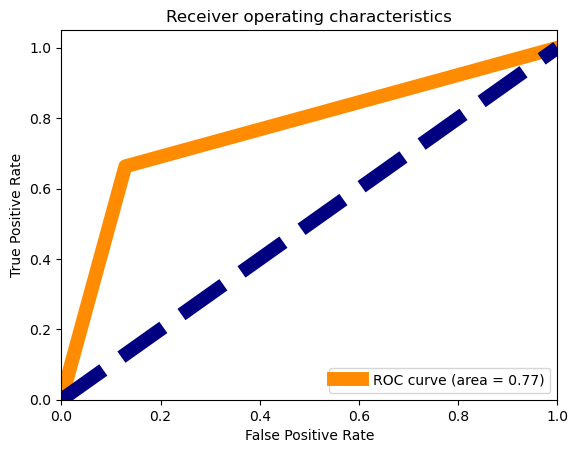

In [94]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

77% under curve is a decent amount

In [96]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)

,Actual,Predict
9,1,1
11,0,0
13,1,0
16,0,0
24,1,1
...,...,...
32534,0,0
32537,1,0
32547,0,1
32556,1,0


In [97]:
import pickle
filename= 'Census.pkl'
pickle.dump(rf, open(filename,'wb'))
loaded_model= pickle.load(open('Census.pkl', 'rb'))